In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#https://drive.google.com/file/d/1B3IdBV4UuoN_UiP0vVkz1-BlF7njzMV3/view
id = '1B3IdBV4UuoN_UiP0vVkz1-BlF7njzMV3'
link = f'https://drive.google.com/uc?id={id}'
data = pd.read_csv(link)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<ipython-input-8-72c065de4184>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True, cmap='mako')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


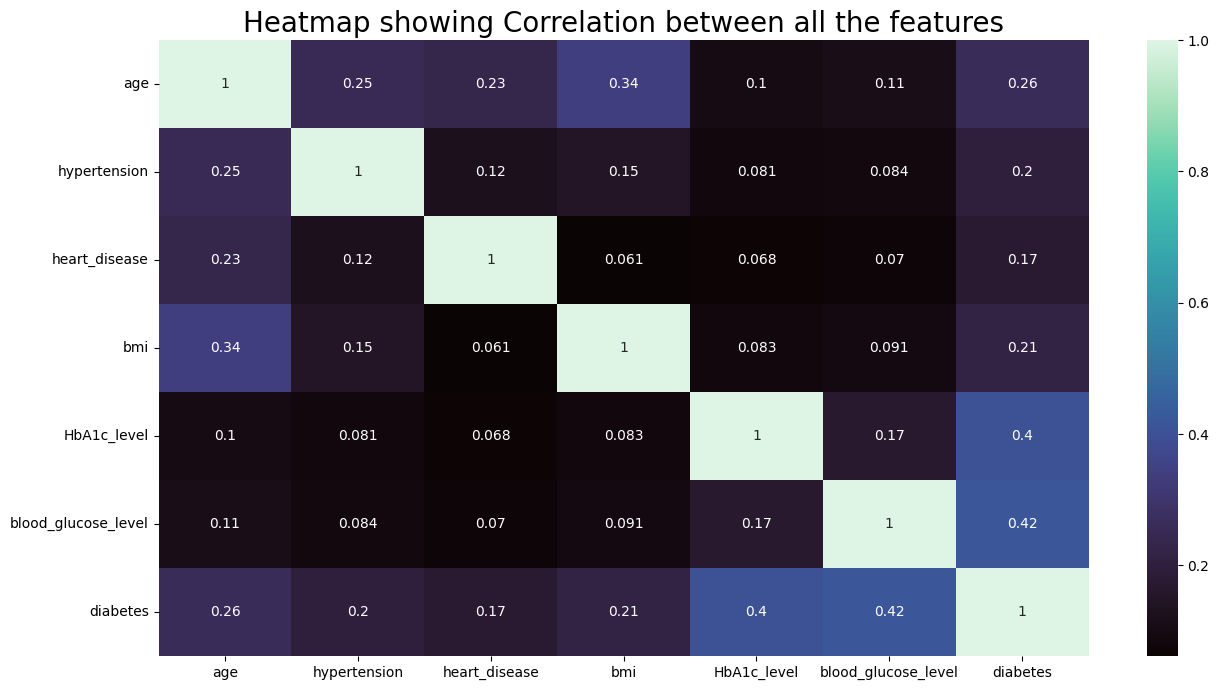

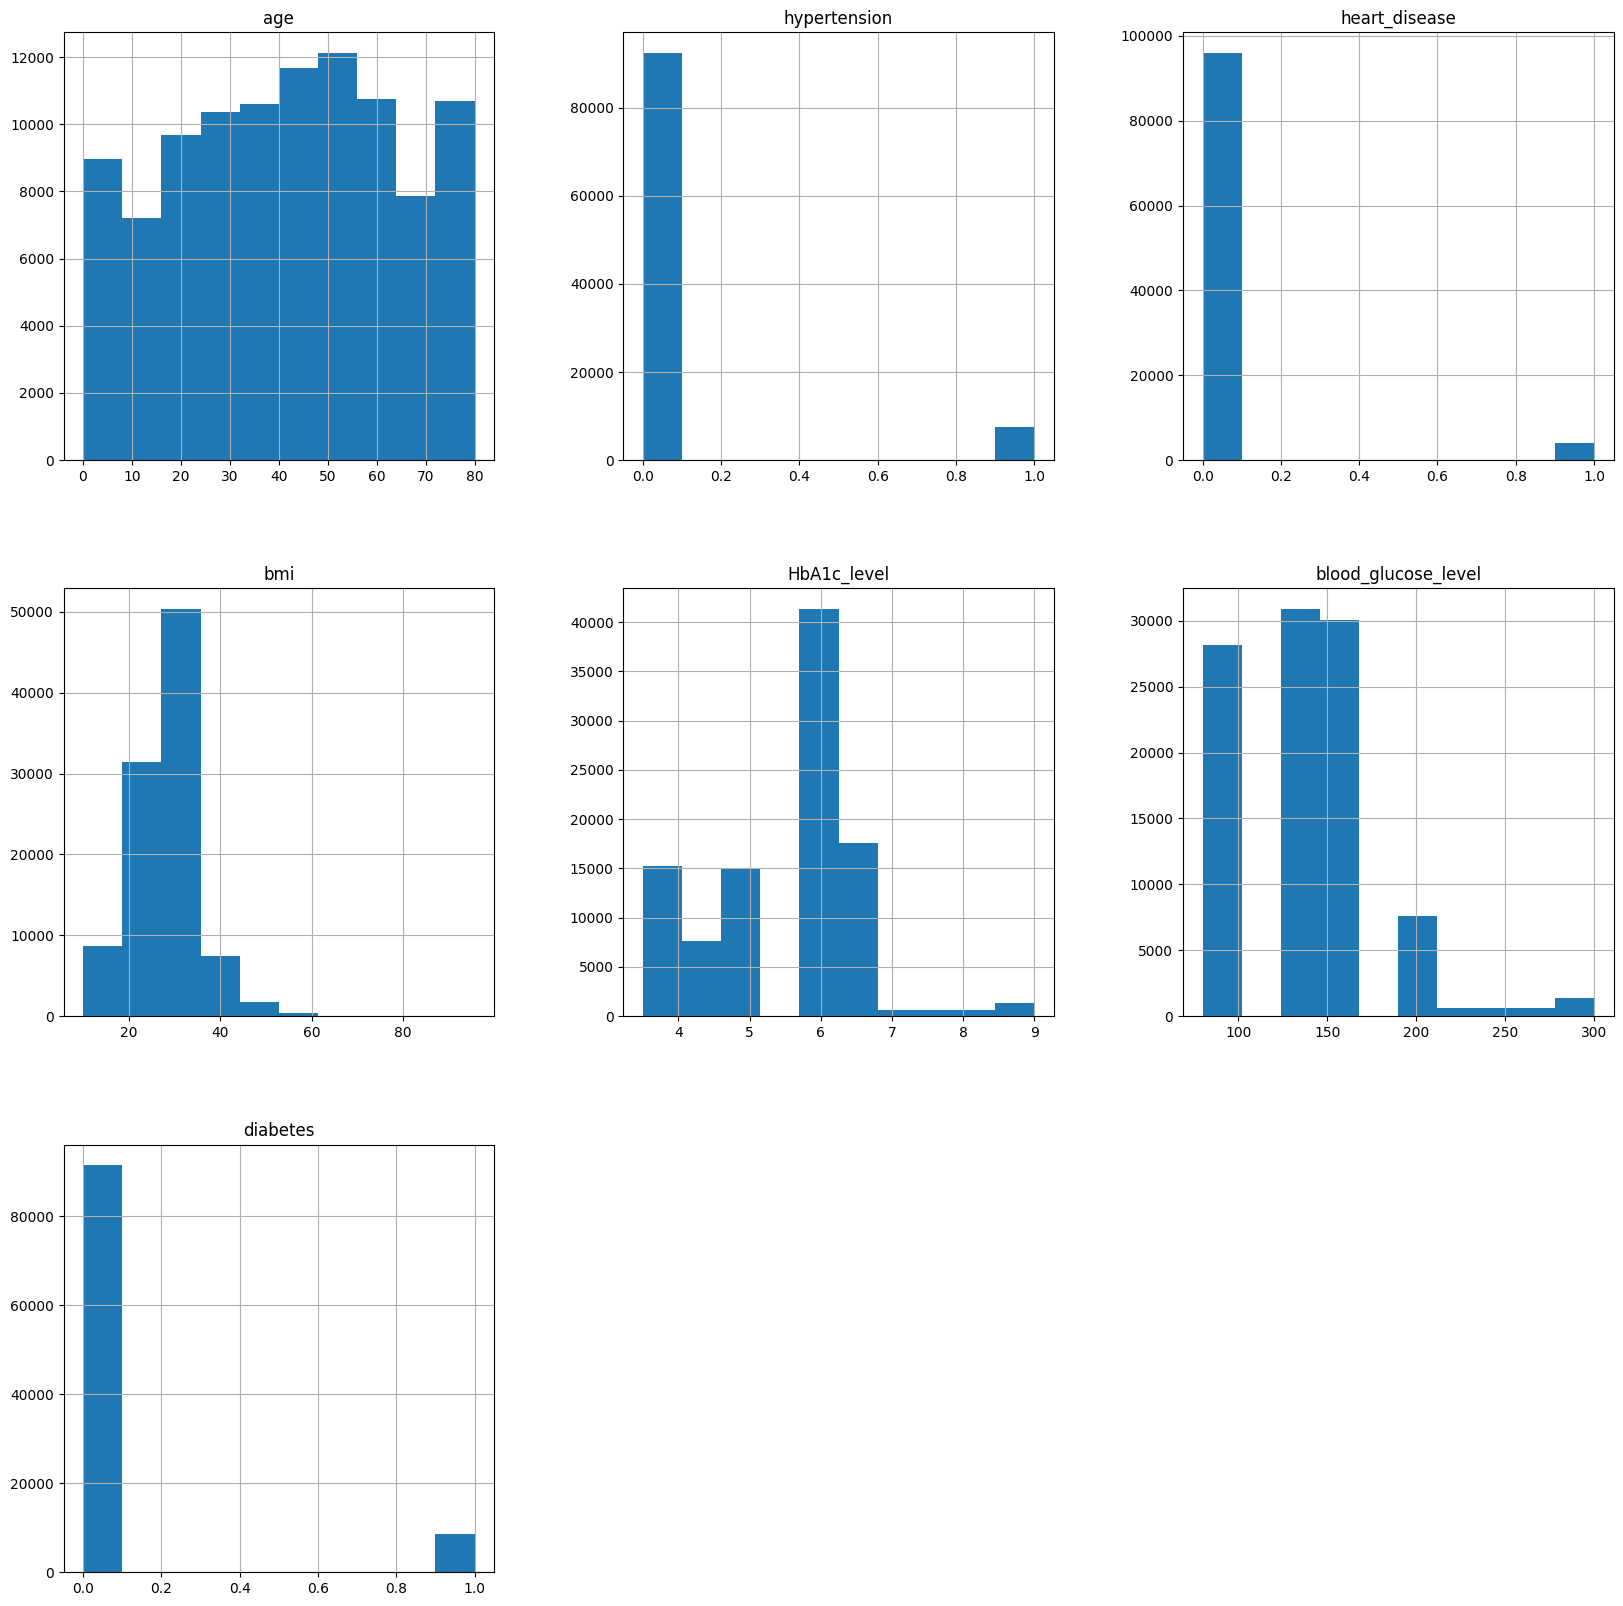

In [8]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(data.corr(),annot = True, cmap='mako')

data.columns
data.info()
p = data.hist (figsize = (20,20))

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99995    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 100000, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

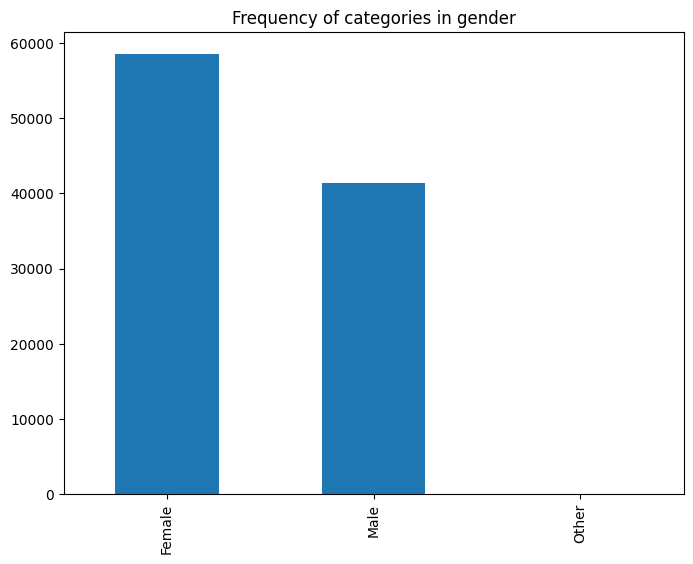

In [24]:
data_gender = data.iloc[:, 0]
print(data_gender)
data_gender_count = data_gender.value_counts()
plt.figure(figsize=(8, 6))
data_gender_count.plot(kind='bar')
plt.title('Frequency of categories in gender')
plt.show

In [40]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(x)
print(y)

[['Female' 80.0 0 ... 25.19 6.6 140]
 ['Female' 54.0 0 ... 27.32 6.6 80]
 ['Male' 28.0 0 ... 27.32 5.7 158]
 ...
 ['Male' 66.0 0 ... 27.83 5.7 155]
 ['Female' 24.0 0 ... 35.42 4.0 100]
 ['Female' 57.0 0 ... 22.43 6.6 90]]
[0 0 0 ... 0 0 0]


In [12]:
print(y)

[0 0 0 ... 0 0 0]


In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

columnTransform = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),  [0])], remainder= 'passthrough')
x = columnTransform.fit_transform(x)
columnTransform1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),  [-4])], remainder= 'passthrough')
x = columnTransform1.fit_transform(x)
print(x[0])

[0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 80.0 0 1 25.19 6.6 140]


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x[:, -6:] = sc.fit_transform(x[:, -6:])
# x[:, 3:6] = sc.fit_transform(x[:, 3:6])
print(x[0])

[0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.69270354052641 -0.2844394470875535
 4.936378590329144 -0.32105579166018583 1.0017057235707438
 0.04770421587098861]


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 5)
print(x_train[0])
print(x_test[0])

[0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.69270354052641 -0.2844394470875535
 -0.2025776551987079 -0.12367002994273488 -1.8936863610997052
 0.5144437142843222]
[0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.3374121210415246
 -0.2844394470875535 -0.2025776551987079 -0.1553120222791203
 1.0017057235707438 1.521618421386779]


In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.962


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(
  'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  0.0382
mean_absolute_error :  0.0382


In [50]:
print("Actual\t:\tPredictions")
for i in range(len(y_pred)):
  print(f"{y_train[i]}\t:\t{y_pred[i]}")

Streaming output truncated to the last 5000 lines.
0	:	0
0	:	0
0	:	0
0	:	1
1	:	0
0	:	0
0	:	0
0	:	0
0	:	1
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	1
0	:	0
0	:	0
0	:	1
0	:	0
0	:	1
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	1
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
1	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0	:	0
0

In [54]:
import pickle
pickle.dump(linear_classifier, open('model.pkl','wb'))